Installing the necessary packages.

In [ ]:
install.packages("betareg")
install.packages("qcc")
install.packages("rattle")

Initiating the packages.

In [ ]:
library(betareg)
library(qcc)
library(rattle)

Relative Humidity in Sydney, Australia



In [ ]:
# getting the dataset from the rattle package
data(weatherAUS)
head(weatherAUS)
tail(weatherAUS)

Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,⋯,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<ord>,<dbl>,<ord>,⋯,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<fct>,<dbl>,<fct>
2008-12-01,Albury,13.4,22.9,0.6,NA,NA,W,44,W,⋯,22,1007.7,1007.1,8,NA,16.9,21.8,No,0.0,No
2008-12-02,Albury,7.4,25.1,0.0,NA,NA,WNW,44,NNW,⋯,25,1010.6,1007.8,NA,NA,17.2,24.3,No,0.0,No
2008-12-03,Albury,12.9,25.7,0.0,NA,NA,WSW,46,W,⋯,30,1007.6,1008.7,NA,2,21.0,23.2,No,0.0,No
2008-12-04,Albury,9.2,28.0,0.0,NA,NA,NE,24,SE,⋯,16,1017.6,1012.8,NA,NA,18.1,26.5,No,1.0,No
2008-12-05,Albury,17.5,32.3,1.0,NA,NA,W,41,ENE,⋯,33,1010.8,1006.0,7,8,17.8,29.7,No,0.2,No
2008-12-06,Albury,14.6,29.7,0.2,NA,NA,WNW,56,W,⋯,23,1009.2,1005.4,NA,NA,20.6,28.9,No,0.0,No


Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,⋯,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<ord>,<dbl>,<ord>,⋯,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<fct>,<dbl>,<fct>
2022-02-22,Uluru,18.9,35.4,0,NA,NA,ENE,33,ENE,⋯,18,1009.6,1005.5,NA,NA,25.3,33.9,No,0,No
2022-02-23,Uluru,20.6,37.0,0,NA,NA,E,31,E,⋯,17,1008.9,1005.6,NA,NA,27.1,35.4,No,0,No
2022-02-24,Uluru,18.7,36.9,0,NA,NA,SSE,52,E,⋯,15,1011.2,1007.6,NA,NA,27.3,35.7,No,0,No
2022-02-25,Uluru,20.6,37.4,0,NA,NA,SE,43,SE,⋯,16,1010.8,1006.6,NA,NA,28.5,35.7,No,0,No
2022-02-26,Uluru,23.0,37.6,0,NA,NA,E,41,ESE,⋯,19,1009.0,1005.6,NA,NA,29.6,35.6,No,0,No
2022-02-27,Uluru,20.9,39.1,0,NA,NA,ENE,43,E,⋯,18,1008.0,1004.2,NA,NA,30.0,37.5,No,0,No


In [ ]:
# checking the dimension of the dataset
dim(weatherAUS)
# checking the locations available in this dataset
table(weatherAUS$Location)

[1] 208495     24


        Adelaide           Albany           Albury     AliceSprings 
            3924             4348             4349             4349 
   BadgerysCreek         Ballarat          Bendigo         Brisbane 
            4301             4349             4340             4502 
          Cairns         Canberra            Cobar     CoffsHarbour 
            4349             4745             4318             4318 
        Dartmoor           Darwin        GoldCoast           Hobart 
            4318             4502             4349             4502 
       Katherine       Launceston        Melbourne MelbourneAirport 
            2887             4349             4502             4318 
         Mildura            Moree     MountGambier      MountGinini 
            4318             4318             4348             4337 
       Newcastle             Nhil        NorahHead    NorfolkIsland 
            4030             2887             4313             4318 
       Nuriootpa       PearceRAAF

It's a big dataset but we are only interested in analysing the relative humidity in Sydney, so we will get this subset and discard the missing values.

In [ ]:
# obtaining the data for Sydney, which is the city we are interested in 
# analysing the relative humidity
df_rh <- na.omit(weatherAUS[weatherAUS$Location == "Sydney",])
attach(df_rh)

# phase I data: we use these observations to fit the model and get 
# the parameter estimates
df_rh_p1 <- df_rh[1:845, c(3,4,5,6,7,15,17,19)]
# phase II data: we monitor these observations after fitting the model to 
# the phase I data and getting the parameter estimates
df_rh_p2 <- df_rh[846:1690, c(3,4,5,6,7,15,17,19)]

In [ ]:
# feature names
names(df_rh_p1)

# summary of each feature
summary(df_rh_p1)

# transforming the target to a uniform scale (the beta regression model 
# only applies to the target in the unit interval (0,1))
df_rh_p1$Humidity3pm <- df_rh_p1$Humidity3pm/100
df_rh_p2$Humidity3pm <- df_rh_p2$Humidity3pm/100

[1] "MinTemp"     "MaxTemp"     "Rainfall"    "Evaporation" "Sunshine"   
[6] "Humidity3pm" "Pressure3pm" "Cloud3pm"

    MinTemp         MaxTemp         Rainfall       Evaporation    
 Min.   : 5.50   Min.   :13.10   Min.   : 0.000   Min.   : 0.200  
 1st Qu.:11.10   1st Qu.:20.20   1st Qu.: 0.000   1st Qu.: 3.200  
 Median :14.40   Median :23.00   Median : 0.000   Median : 5.000  
 Mean   :14.57   Mean   :23.19   Mean   : 2.342   Mean   : 5.318  
 3rd Qu.:18.40   3rd Qu.:26.00   3rd Qu.: 0.800   3rd Qu.: 7.000  
 Max.   :23.70   Max.   :45.80   Max.   :61.400   Max.   :18.400  
    Sunshine       Humidity3pm     Pressure3pm        Cloud3pm    
 Min.   : 0.000   Min.   :10.00   Min.   : 994.8   Min.   :0.000  
 1st Qu.: 5.100   1st Qu.:41.00   1st Qu.:1011.4   1st Qu.:1.000  
 Median : 8.700   Median :53.00   Median :1015.9   Median :4.000  
 Mean   : 7.589   Mean   :52.39   Mean   :1015.9   Mean   :4.015  
 3rd Qu.:10.400   3rd Qu.:63.00   3rd Qu.:1020.6   3rd Qu.:7.000  
 Max.   :13.600   Max.   :92.00   Max.   :1033.6   Max.   :8.000  

In [ ]:
# fitting the beta regression model to the data in phase I
fit <- betareg(Humidity3pm ~ MinTemp + MaxTemp + Rainfall + Evaporation + 
                            Pressure3pm + Cloud3pm | MinTemp + Sunshine + 
                            Pressure3pm, data = df_rh_p1)
summary(fit)


Call:
betareg(formula = Humidity3pm ~ MinTemp + MaxTemp + Rainfall + Evaporation + 
    Pressure3pm + Cloud3pm | MinTemp + Sunshine + Pressure3pm, data = df_rh_p1)

Standardized weighted residuals 2:
    Min      1Q  Median      3Q     Max 
-2.7212 -0.6795  0.0076  0.6734  3.3808 

Coefficients (mean model with logit link):
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -20.693057   2.629894  -7.868 3.59e-15 ***
MinTemp       0.116126   0.006035  19.243  < 2e-16 ***
MaxTemp      -0.072942   0.006217 -11.732  < 2e-16 ***
Rainfall      0.012084   0.002646   4.567 4.95e-06 ***
Evaporation  -0.050896   0.006629  -7.678 1.61e-14 ***
Pressure3pm   0.020445   0.002532   8.074 6.79e-16 ***
Cloud3pm      0.065741   0.006201  10.601  < 2e-16 ***

Phi coefficients (precision model with log link):
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -60.408987   7.685393  -7.860 3.83e-15 ***
MinTemp       0.028431   0.012122   2.345    0.019 *  
Sunshine      0.0

We now have a final model and we can start analysing if it is a good model to represent our data.

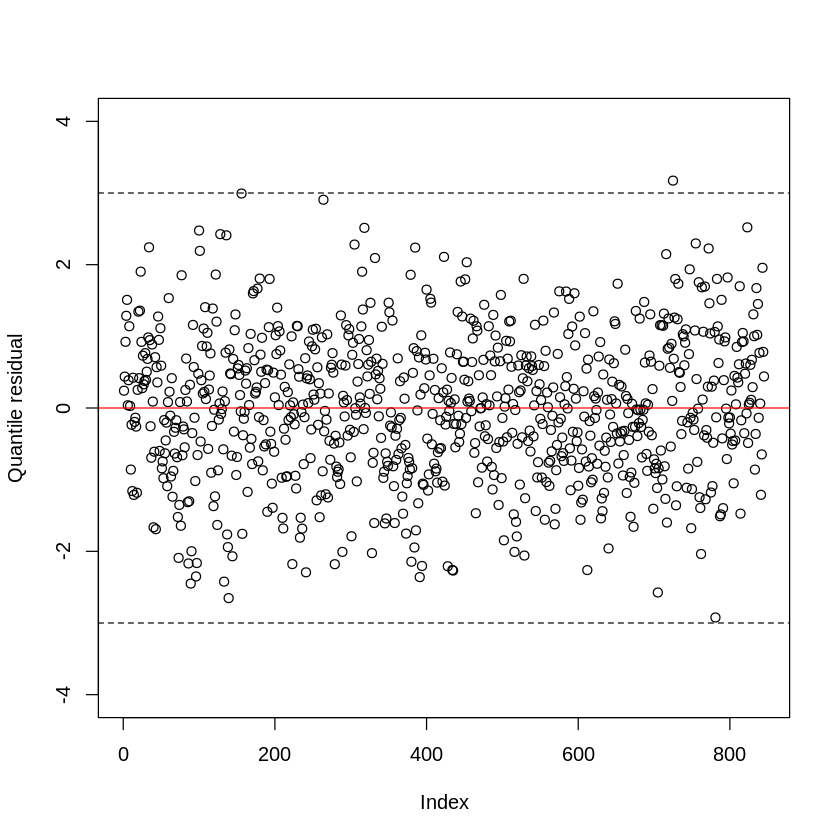

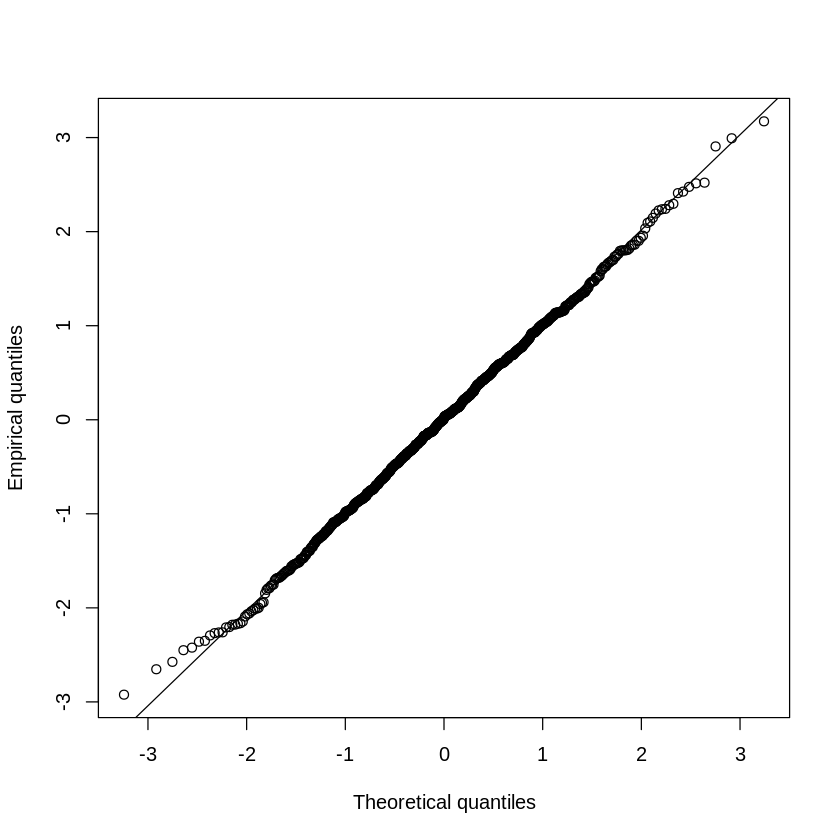

In [ ]:
# obtaining the design matrices for both submodels
X_mu <- cbind(1, df_rh_p1[,c(1,2,3,4,7,8)])
X_phi <- cbind(1, df_rh_p1[,c(1,5,7)])

# linear predictor for each submodel
eta_mu <- as.matrix(X_mu)%*%fit$coefficients$mean
eta_phi <- as.matrix(X_phi)%*%fit$coefficients$precision

shape1 <- exp(eta_mu)/(1+exp(eta_mu))
shape2 <- exp(eta_phi)

# parameters of the beta regression distribution
p <- shape1*shape2
q <- shape2-(shape1*shape2)

rh <- df_rh_p1$Humidity3pm

# quantile residual
residual <- qnorm(pbeta(rh, p, q))

# plot of the residuals
plot(residual, caption = NULL, sub.caption = NULL, ylim = c(-4,4), 
     ylab = "Quantile residual", xlab = "Index")
abline(h = c(-3,3), lty = 2)
abline(h = 0, col = "red")

# qqplot of the residuals
qqnorm(residual, caption = NULL, main = "", ylab = "Empirical quantiles",  
       xlab = "Theoretical quantiles")
qqline(residual)

Notice that the residuals are randomly distributed around zero and there is no clear pattern, suggesting that the residuals are independent. In the QQ plot we can see that the residuals follow a standard normal distribution as the empirical quantiles fall on or very close to the 45 degree line.

In [ ]:
# design matrices for the data in phase II
X_mu2 <- cbind(1, df_rh_p2[,c(1,2,3,4,7,8)])
X_phi2 <- cbind(1, df_rh_p2[,c(1,5,7)])

# linear predictor for each submodel
eta_mu2 <- as.matrix(X_mu2)%*%fit$coefficients$mean
eta_phi2 <- as.matrix(X_phi2)%*%fit$coefficients$precision

shape1_2 <- exp(eta_mu2)/(1+exp(eta_mu2))
shape2_2 <- exp(eta_phi2)

p2 <-shape1_2*shape2_2
q2 <-shape2_2-(shape1_2*shape2_2)

# rh of phase II data 
rh2 <- df_rh_p2$Humidity3pm

In [ ]:
set.seed(1)
# residuals for the phase II data
res2 <- qnorm(pbeta(rh2, p2, q2))

# control limits
control_limits <- cusum(res2, center = mean(residual), std.dev = sd(residual),
                decision.interval = 3*1.842887, se.shift = 1, plot = F)

DI <- control_limits$decision.interval
cusum_pos <- as.vector(control_limits$pos)
cusum_neg <- as.vector(control_limits$neg)*(-1)

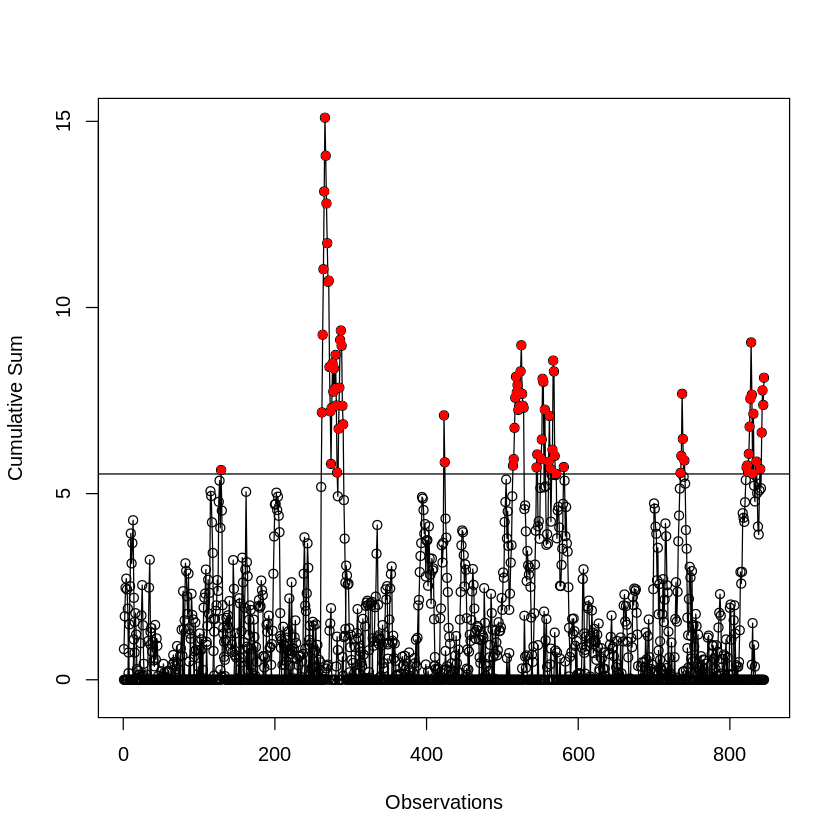

In [ ]:
out_model1 <- c(which(cusum_neg > DI))
out_model2 <- c(which(cusum_pos > DI))

obs1 <- cusum_neg[out_model1]
obs2 <- cusum_pos[out_model2]

# red dots are observations out of control
plot(cusum_pos, xaxs = "r", type = "o", lwd = 1, pch = 1, 
                ylab = expression("Cumulative Sum"),
                xlab = expression("Observations"), 
                ylim = c(-0.4, 15))
points(cusum_neg, type = "o", xaxs = "r", lwd = 1, pch = 1) 
abline(h = DI, lwd = 1, lty = 1)
points(out_model1, obs1, pch = 16, col = "red")
points(out_model2, obs2, pch = 16, col = "red")